In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
for dirname, _, filenames in os.walk('C:/Users/JOSUA ATMAJA/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/JOSUA ATMAJA/input\covid-sentiment.csv
C:/Users/JOSUA ATMAJA/input\indonesian_vaccination_tweets.csv
C:/Users/JOSUA ATMAJA/input\PREPROCESSED-covid-sentiment.csv
C:/Users/JOSUA ATMAJA/input\RAW-covid-sentiment.csv
C:/Users/JOSUA ATMAJA/input\TRANSLATED-covid-sentiment.csv


In [6]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [7]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# PREPROCESSED-covid-sentiment.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:/Users/JOSUA ATMAJA/input/PREPROCESSED-covid-sentiment.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'PREPROCESSED-covid-sentiment.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 13 columns


In [12]:
df1.head(5)

,level_0,index,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags
0,0,0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,pemerintah lampung bantuan mahasiswa derasnya ...,[],0,3,0,[]
1,1,1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,pemerintah menerapkan herd immunity kemampuan ...,['mas__piyuuu'],0,0,0,[]
2,2,2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,lakukan makanan berbuka sahur 10 kepala keluar...,['oiivert'],0,0,0,[]
3,3,3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,warga positif corona bupati kondisi menuntut k...,[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky..."
4,4,4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,emosi banget kondisi disuruh liputan covid dos...,[],0,0,0,['#dirumahaja']


<ipython-input-6-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-6-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


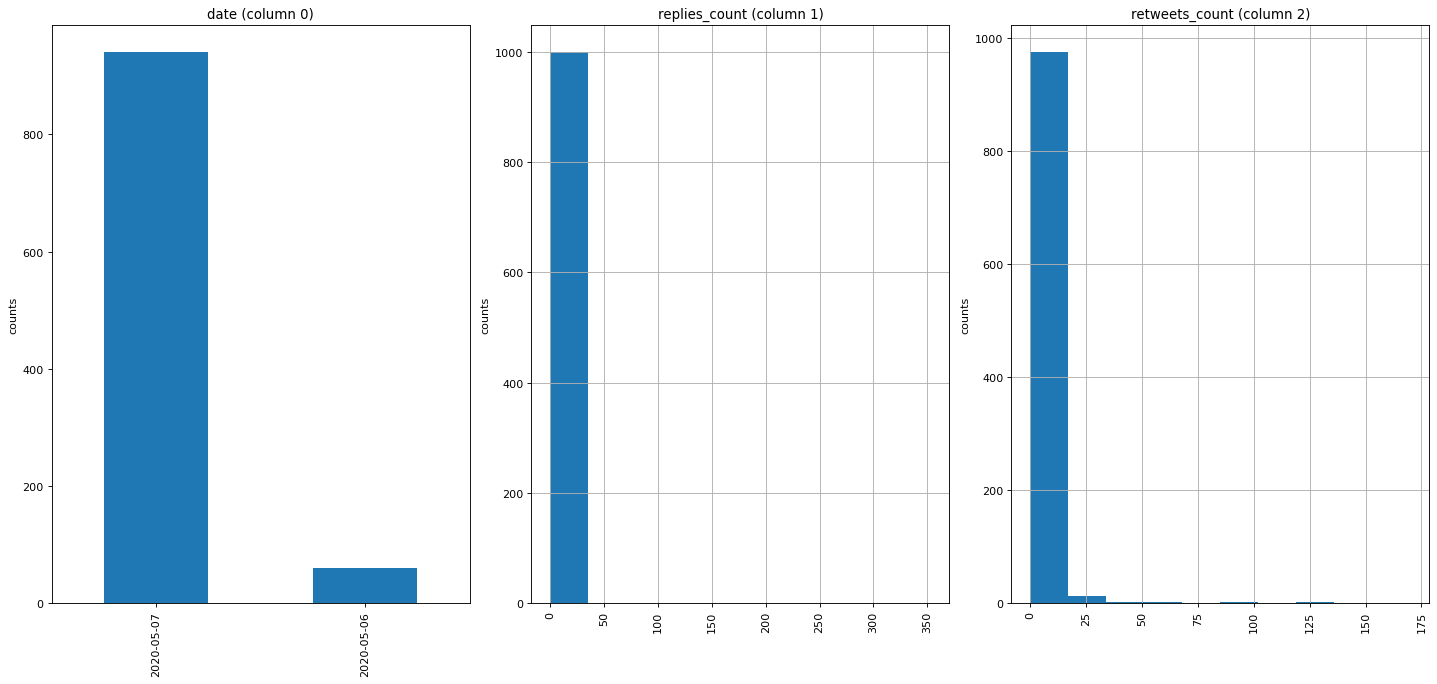

In [13]:
plotPerColumnDistribution(df1, 50, 25)

<ipython-input-7-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


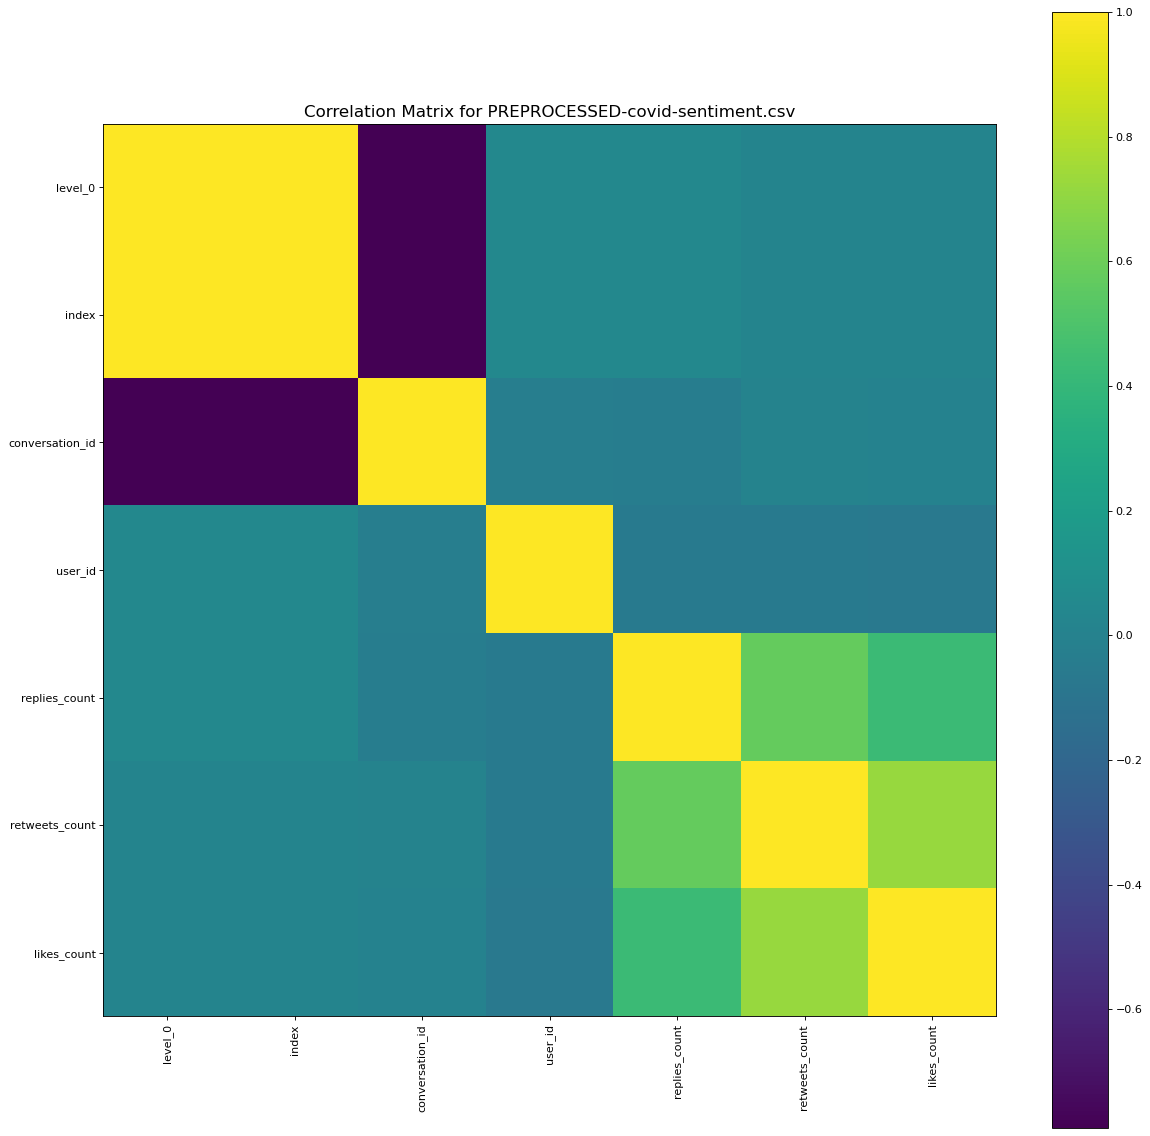

In [14]:
plotCorrelationMatrix(df1, 18)

<ipython-input-8-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


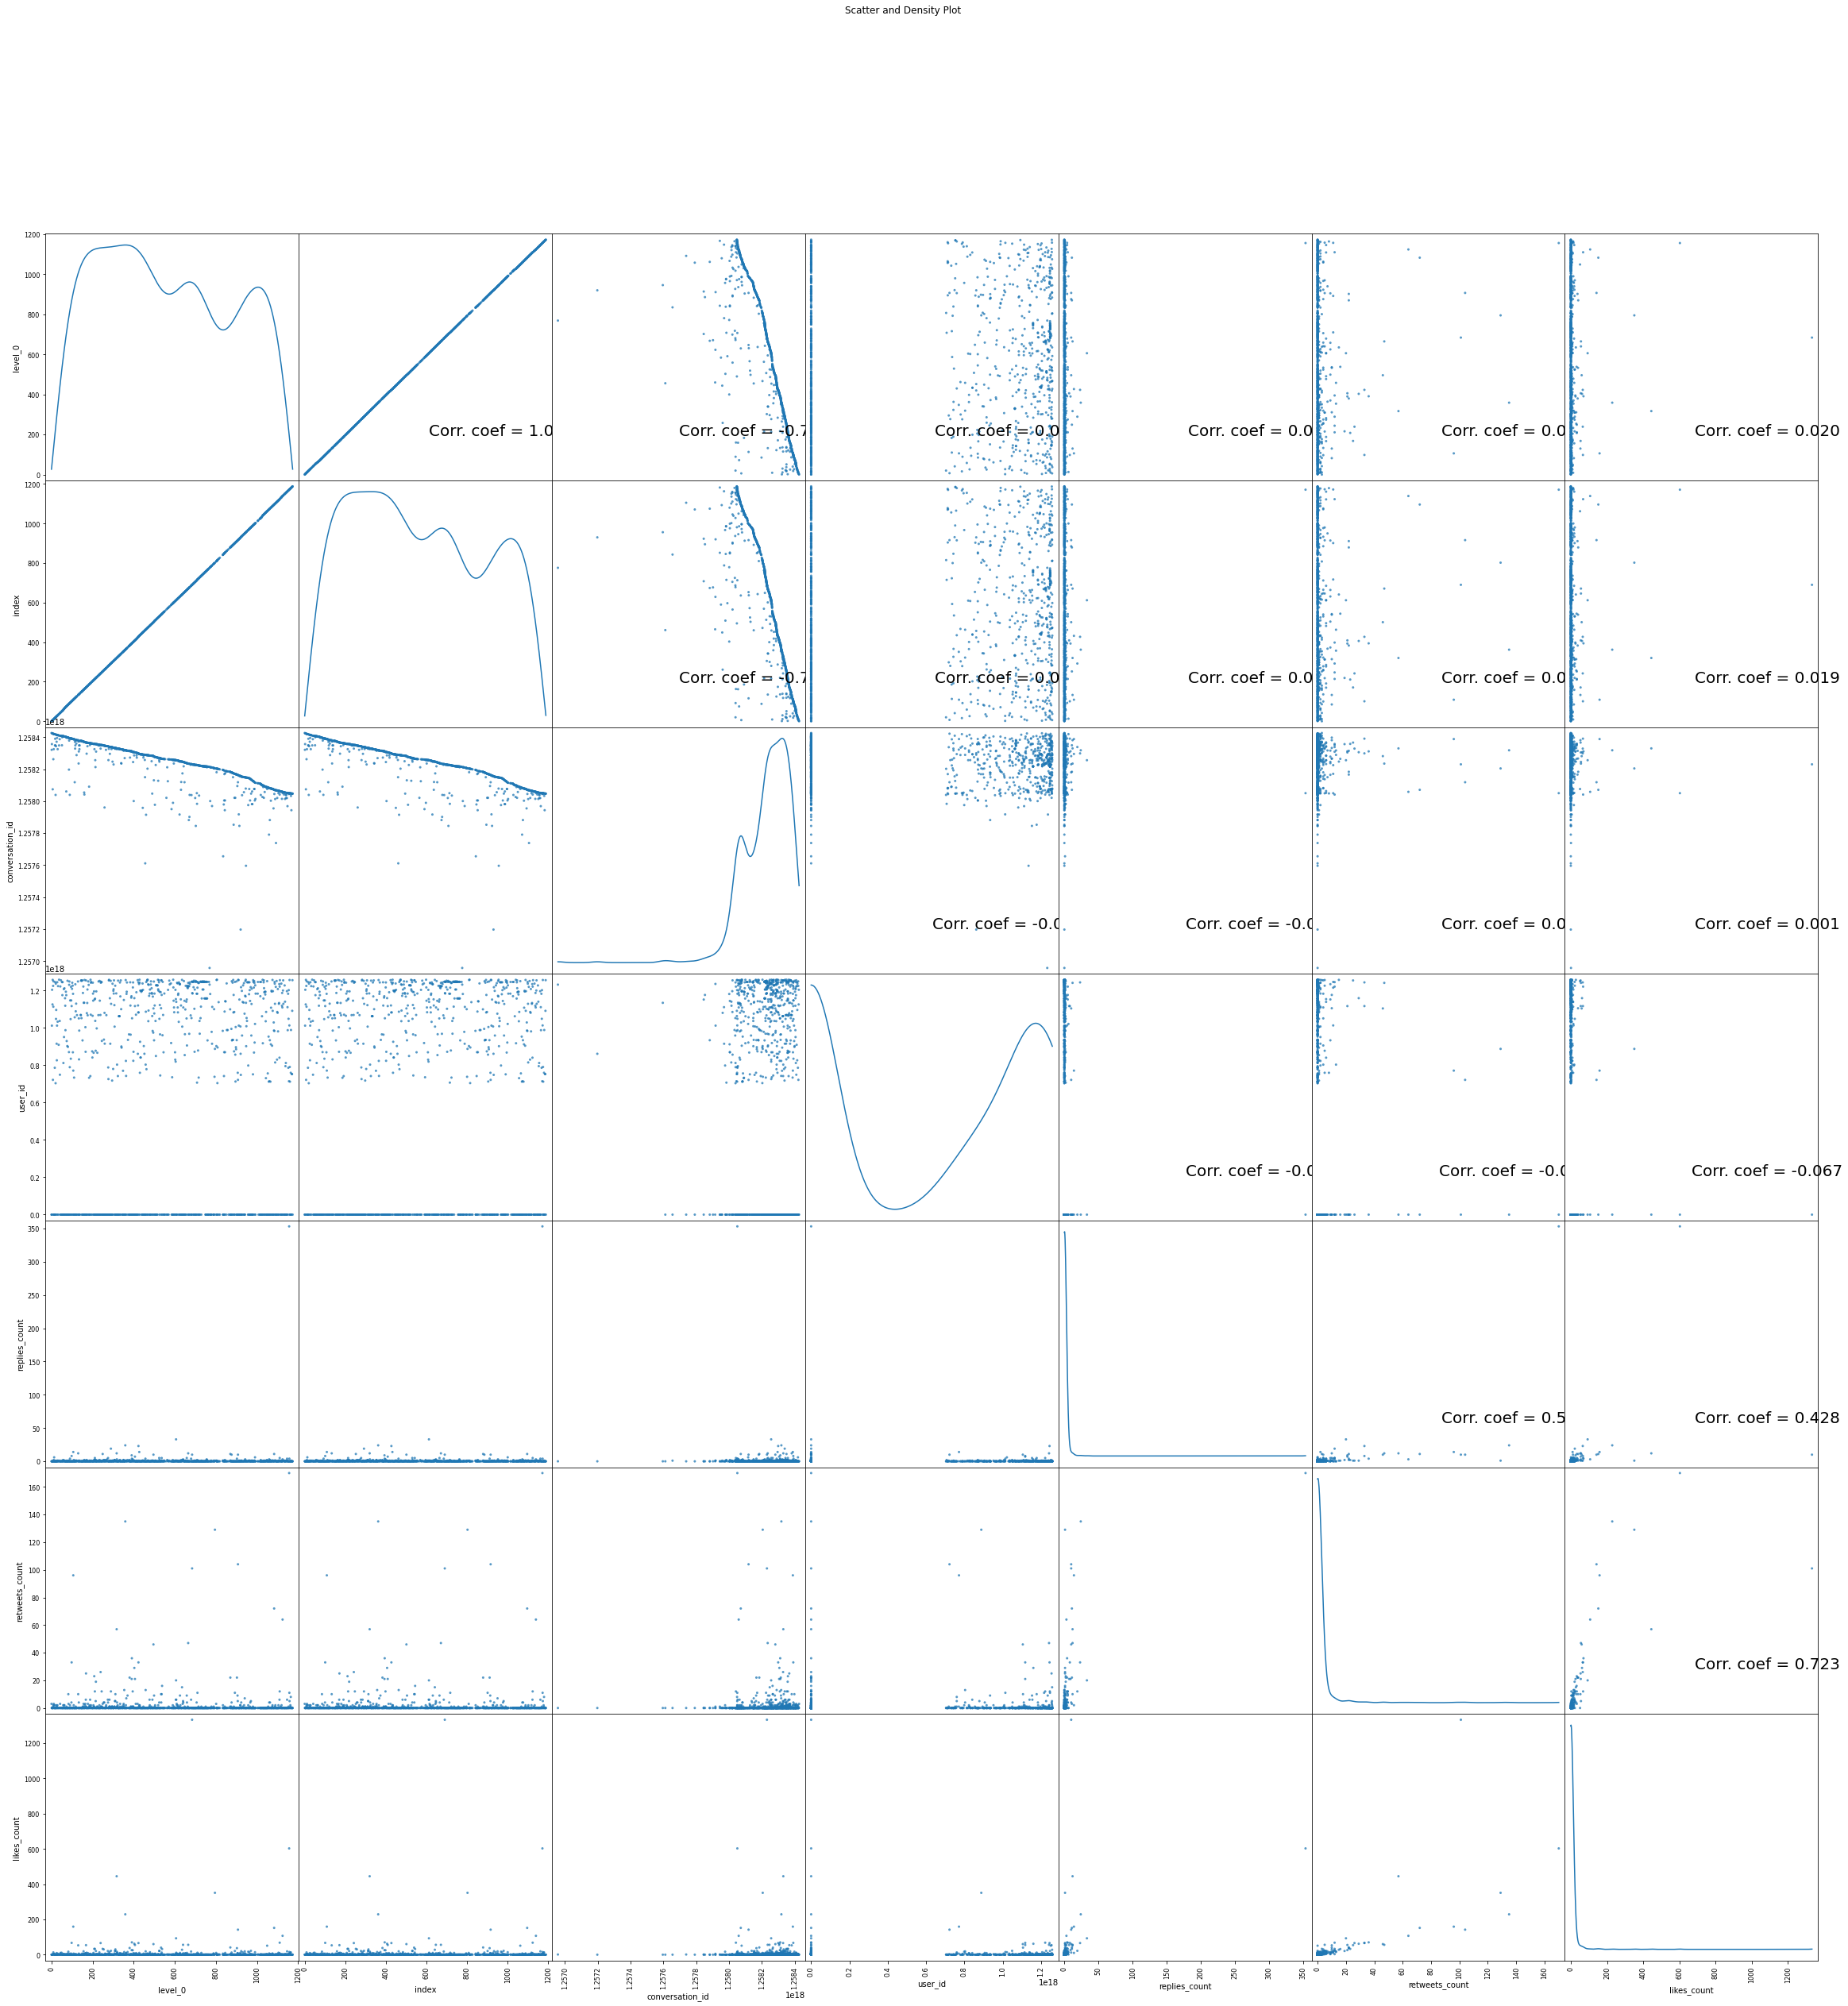

In [15]:
plotScatterMatrix(df1, 40, 20)

In [16]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# RAW-covid-sentiment.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('C:/Users/JOSUA ATMAJA/input/RAW-covid-sentiment.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'RAW-covid-sentiment.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 36 columns


In [17]:
df2.head(5)

,Unnamed: 0,index,id,conversation_id,created_at,date,time,timezone,user_id,username,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,0,1258425982907637761,1258425982907637761,1588867109000,2020-05-07,23:58:29,Malay Peninsula Standard Time,1058474317,monologis_id,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1058474317', 'username': 'monolo...",NaN,NaN,NaN,NaN
1,1,1,1258425735024275456,1258320972198940675,1588867050000,2020-05-07,23:57:30,Malay Peninsula Standard Time,1179769476,its_dul,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1179769476', 'username': 'its_du...",NaN,NaN,NaN,NaN
2,2,2,1258424688113364993,1258356644427083777,1588866800000,2020-05-07,23:53:20,Malay Peninsula Standard Time,1012156669831229441,meonkbaong,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1012156669831229441', 'username'...",NaN,NaN,NaN,NaN
3,3,3,1258424368993931265,1258424368993931265,1588866724000,2020-05-07,23:52:04,Malay Peninsula Standard Time,1204303690061844481,rakyatdotnews,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1204303690061844481', 'username'...",NaN,NaN,NaN,NaN
4,4,4,1258423545698246656,1258423545698246656,1588866528000,2020-05-07,23:48:48,Malay Peninsula Standard Time,227620381,annisathalib_,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '227620381', 'username': 'annisat...",NaN,NaN,NaN,NaN


<ipython-input-6-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


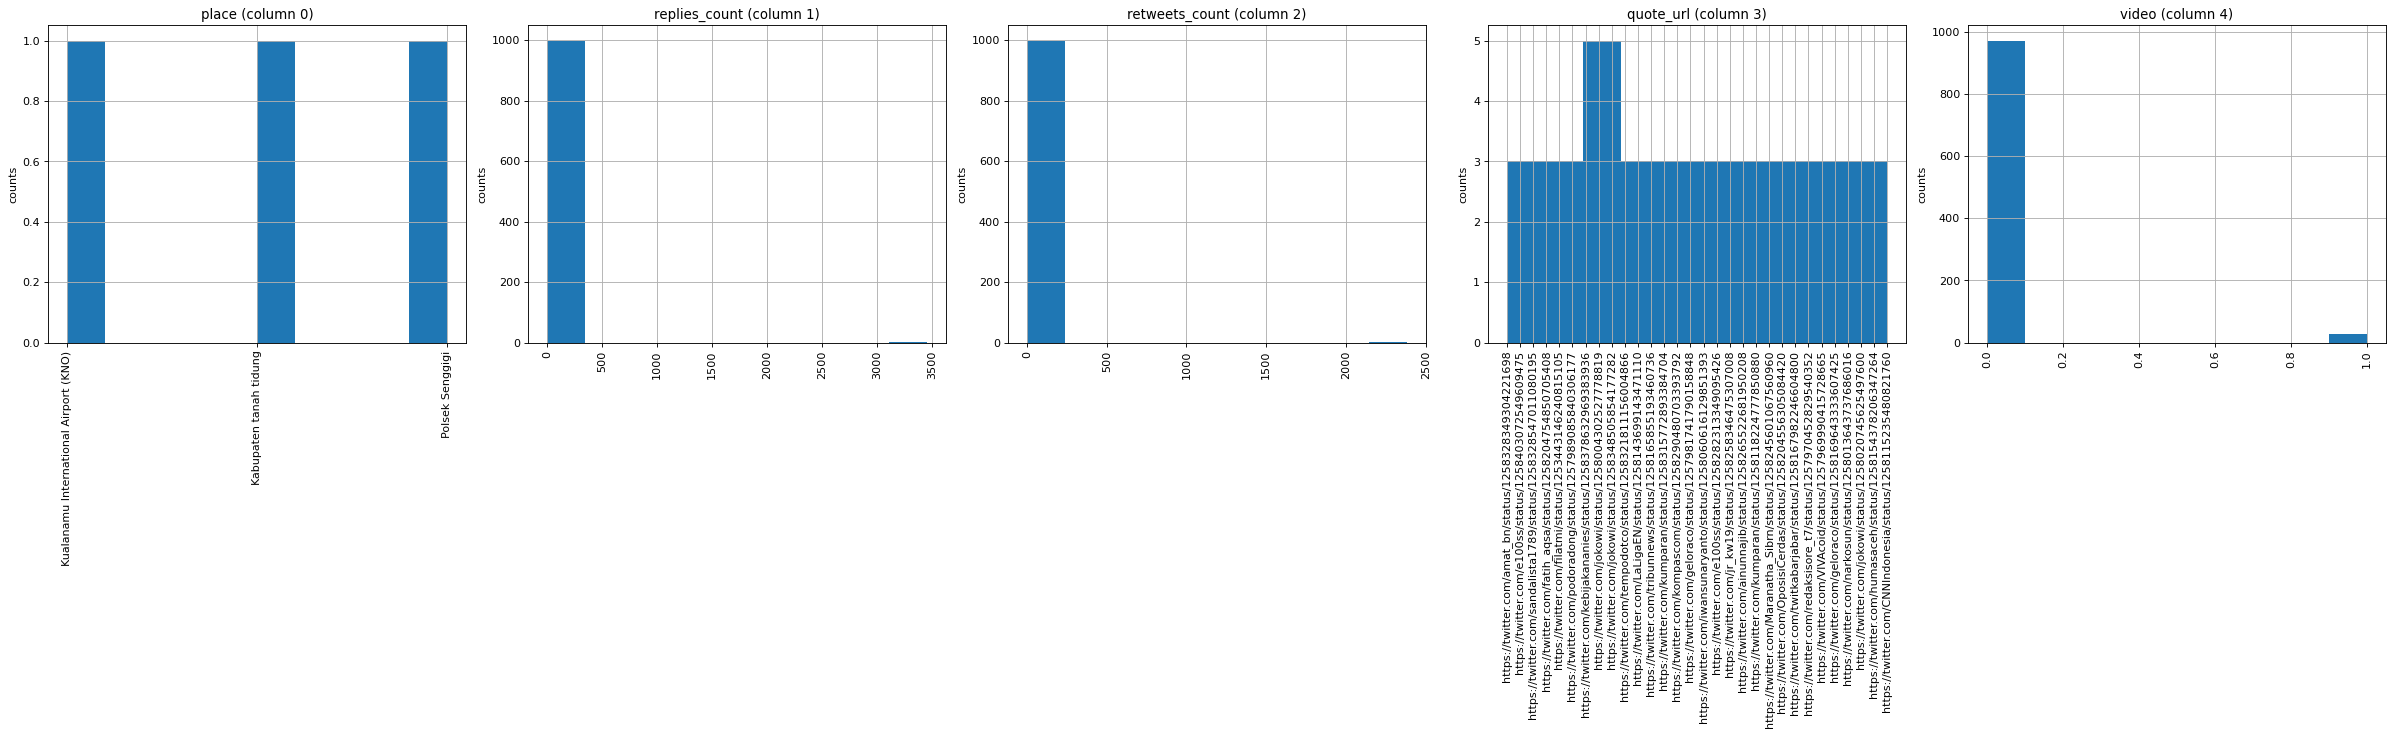

In [18]:
plotPerColumnDistribution(df2, 50, 25)

<ipython-input-7-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


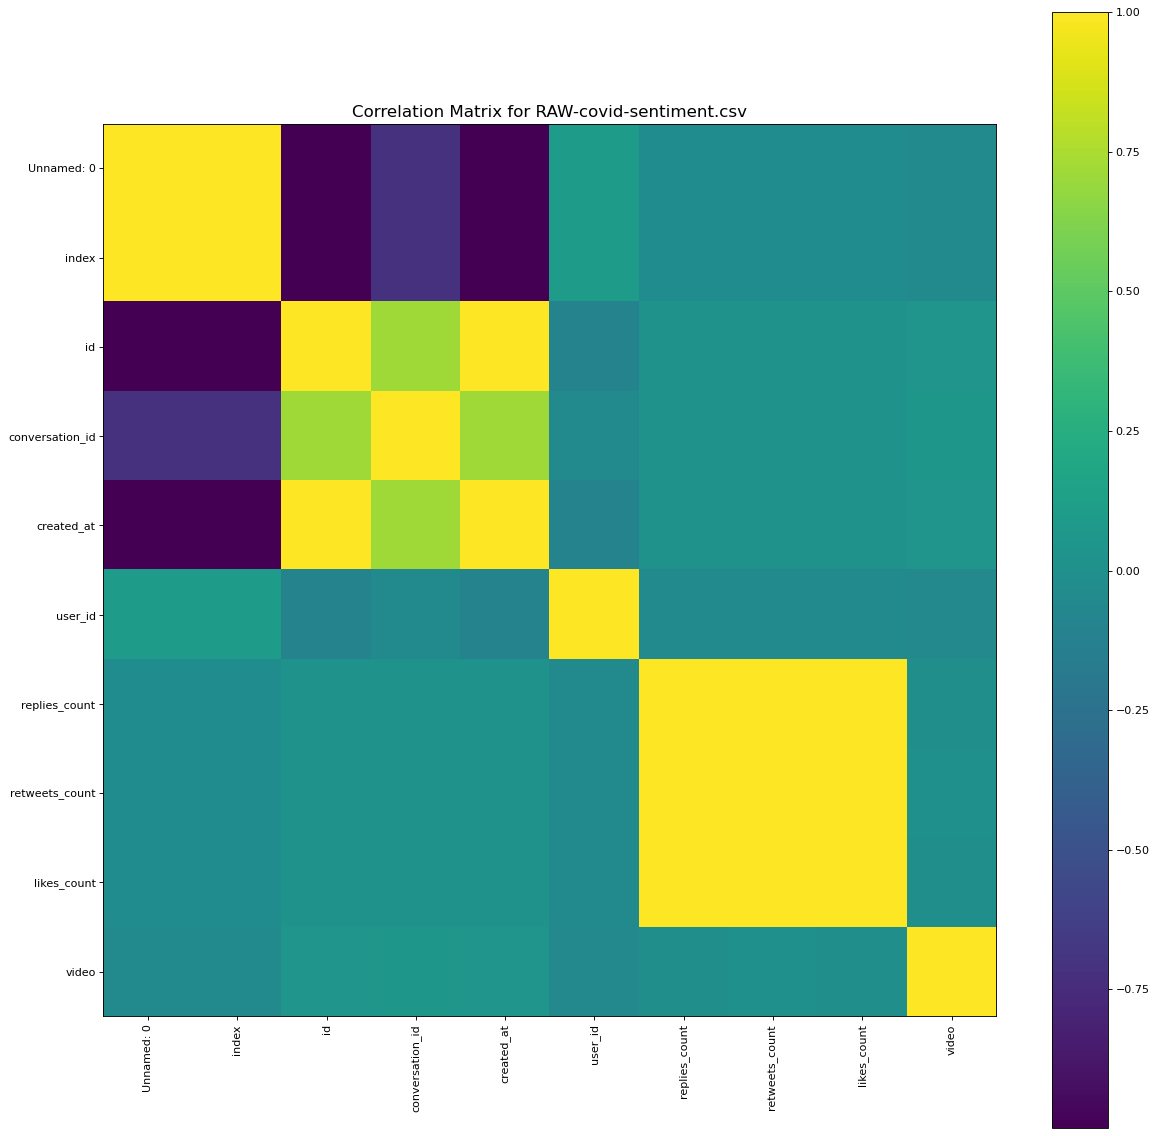

In [19]:
plotCorrelationMatrix(df2, 18)

<ipython-input-8-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


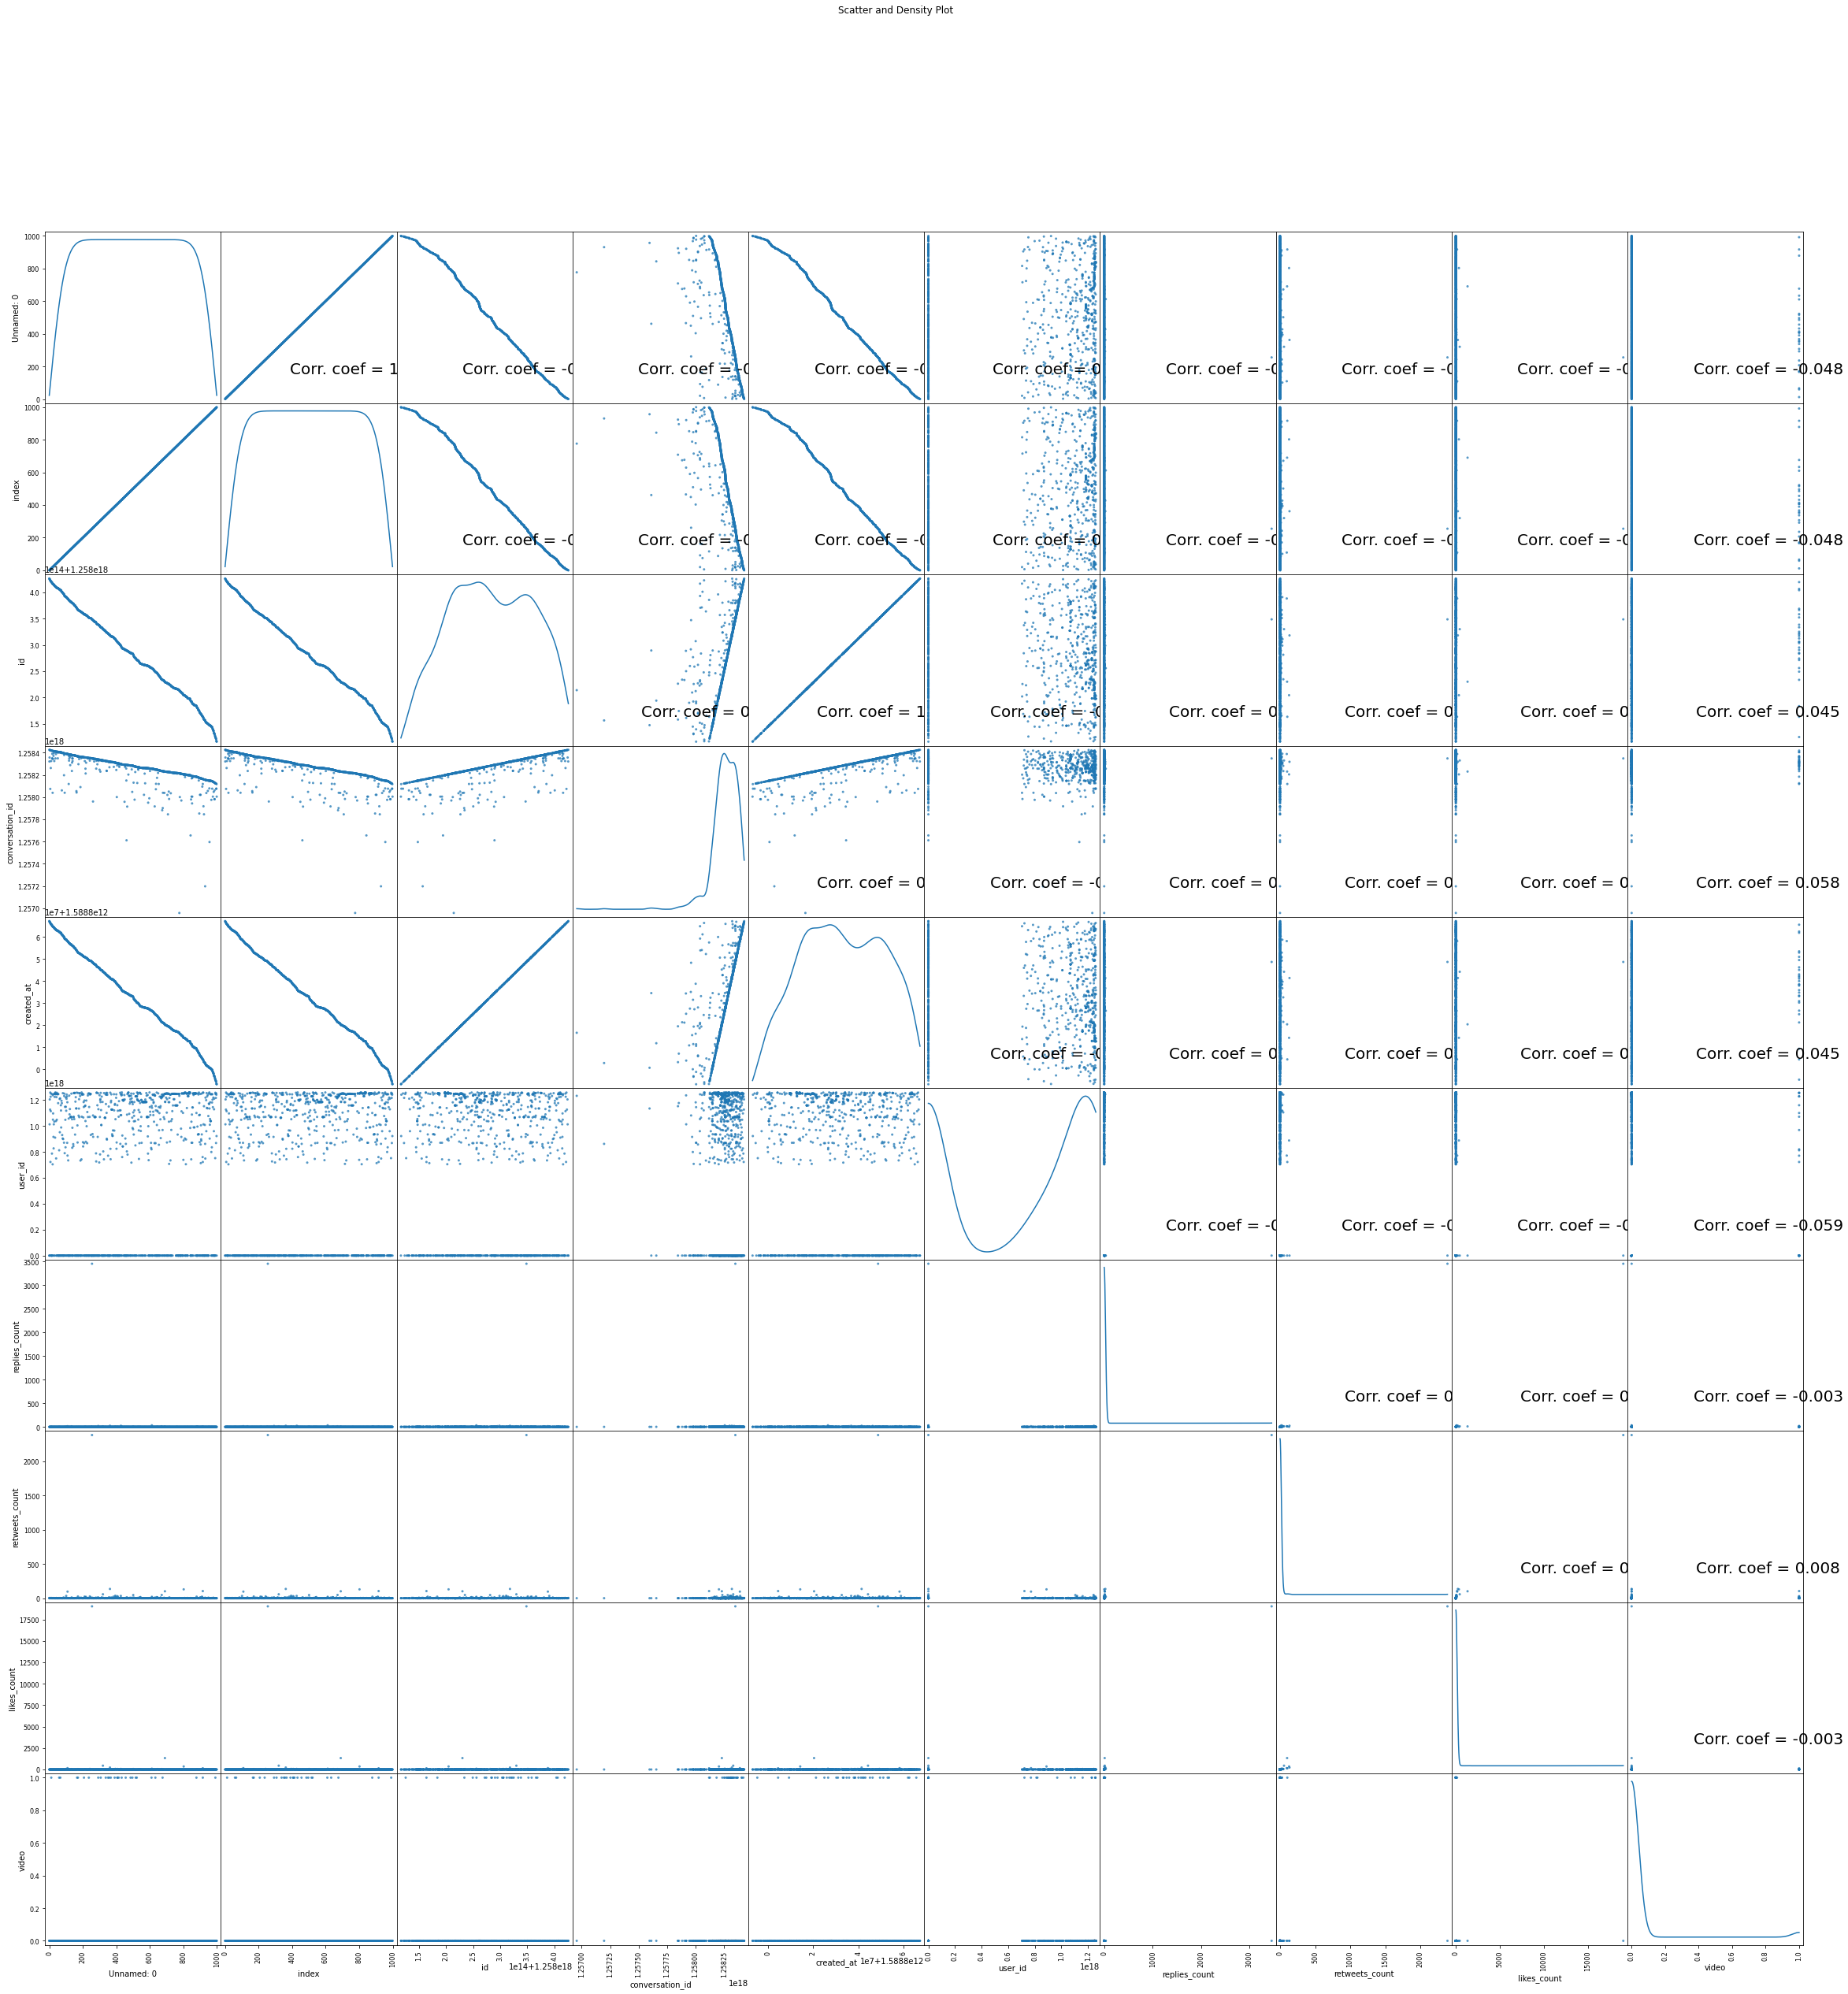

In [20]:
plotScatterMatrix(df2, 40, 20)

In [21]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# TRANSLATED-covid-sentiment.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('C:/Users/JOSUA ATMAJA/input/TRANSLATED-covid-sentiment.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'TRANSLATED-covid-sentiment.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


In [22]:
df3.head(5)

,conversation_id,date,time,user_id,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,translated
0,1258425982907637761,2020-05-07,23:58:29,1058474317,monologis_id,pemerintah lampung bantuan mahasiswa derasnya ...,[],0,3,0,[],the lampung government aid the swift student d...
1,1258320972198940675,2020-05-07,23:57:30,1179769476,its_dul,pemerintah menerapkan herd immunity kemampuan ...,['mas__piyuuu'],0,0,0,[],"the government implements herd immunity, the c..."
2,1258356644427083777,2020-05-07,23:53:20,1012156669831229441,meonkbaong,lakukan makanan berbuka sahur 10 kepala keluar...,['oiivert'],0,0,0,[],do break fasting meals 10 families affected by...
3,1258424368993931265,2020-05-07,23:52:04,1204303690061844481,rakyatdotnews,warga positif corona bupati kondisi menuntut k...,[],0,0,0,"['#rakyatdotnews', '#referensiterkini', '#raky...",positive citizen corona regent conditions dema...
4,1258423545698246656,2020-05-07,23:48:48,227620381,annisathalib_,emosi banget kondisi disuruh liputan covid dos...,[],0,0,0,['#dirumahaja'],"very emotional, conditions were told to cover ..."


<ipython-input-6-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-6-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


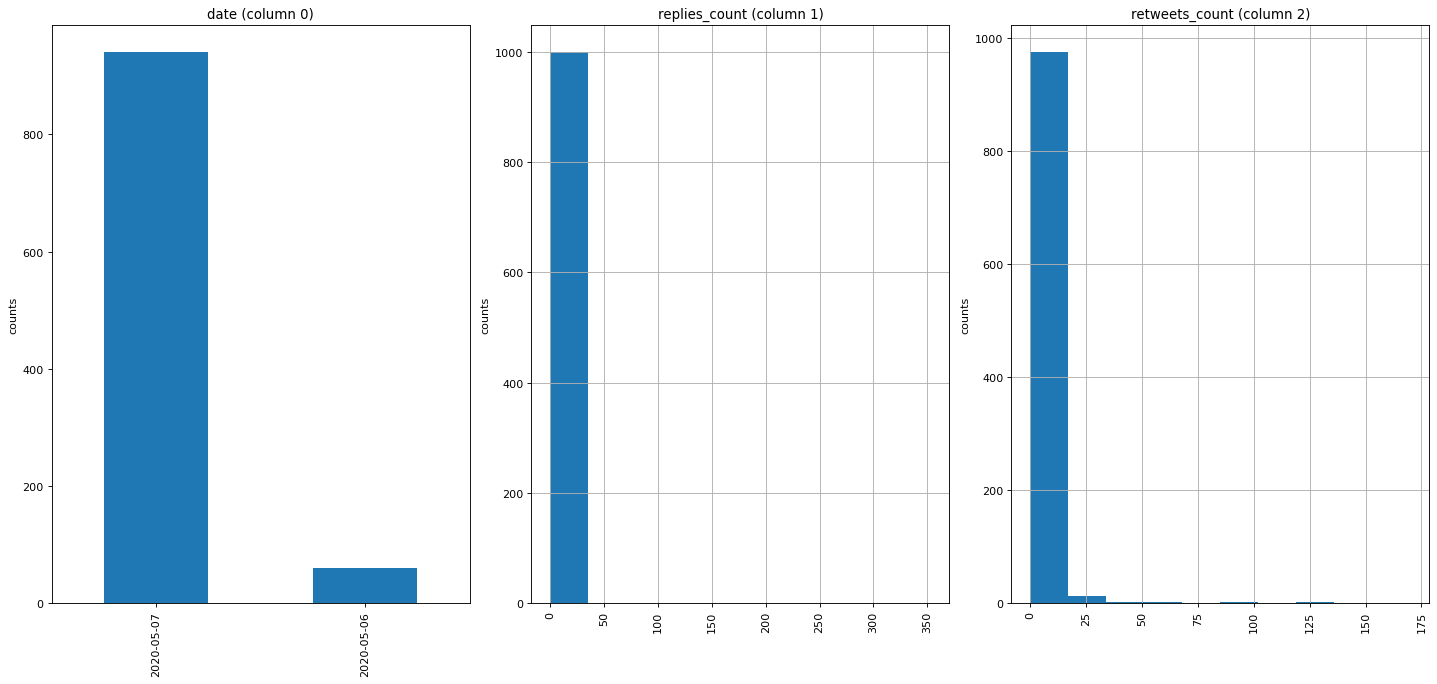

In [25]:
plotPerColumnDistribution(df3, 50, 25)

<ipython-input-7-a0343c621274>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


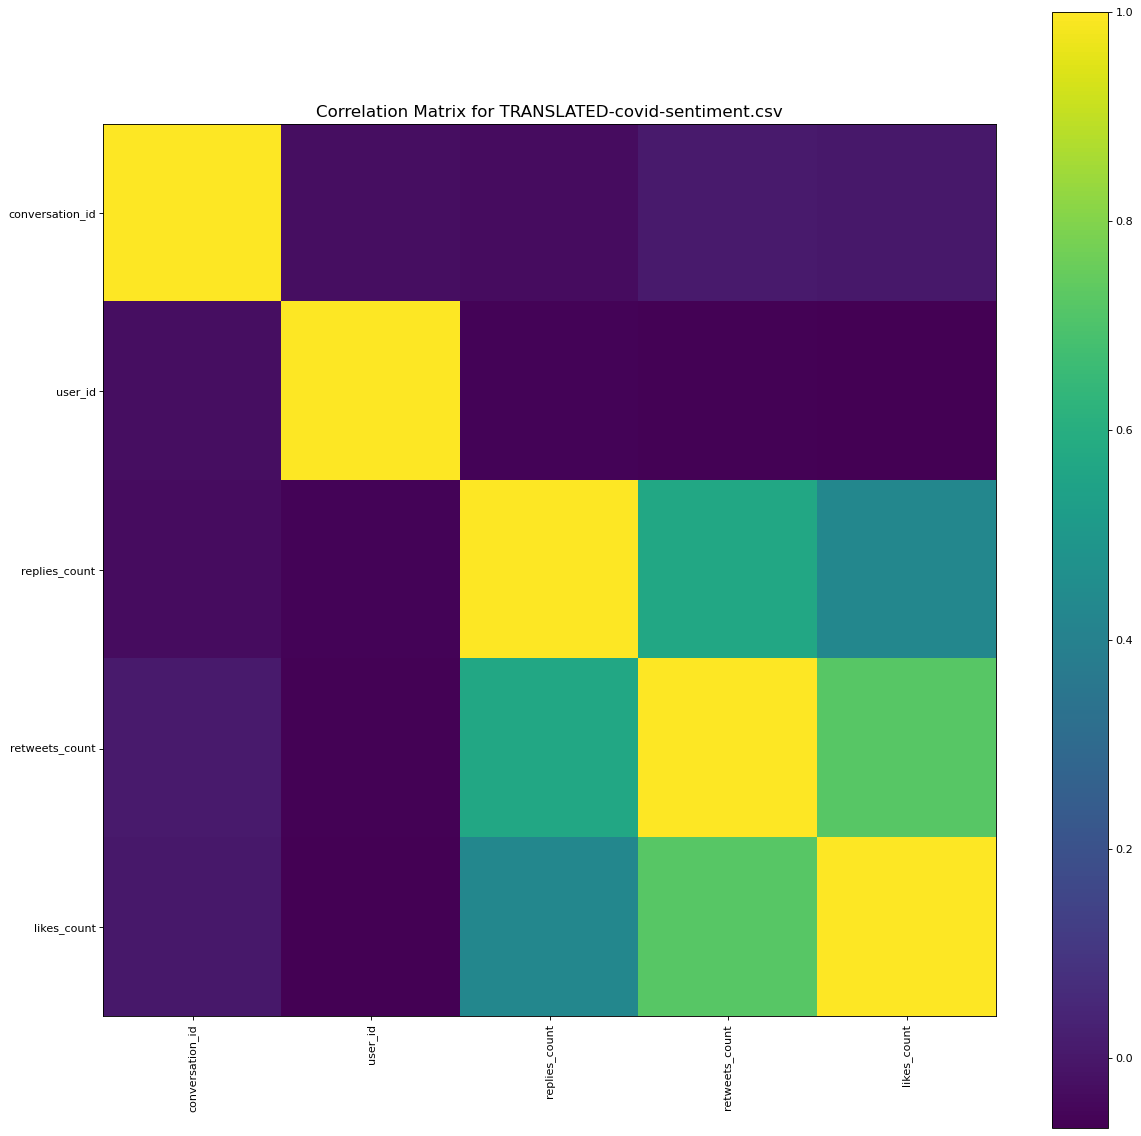

In [24]:
plotCorrelationMatrix(df3, 18)

<ipython-input-8-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


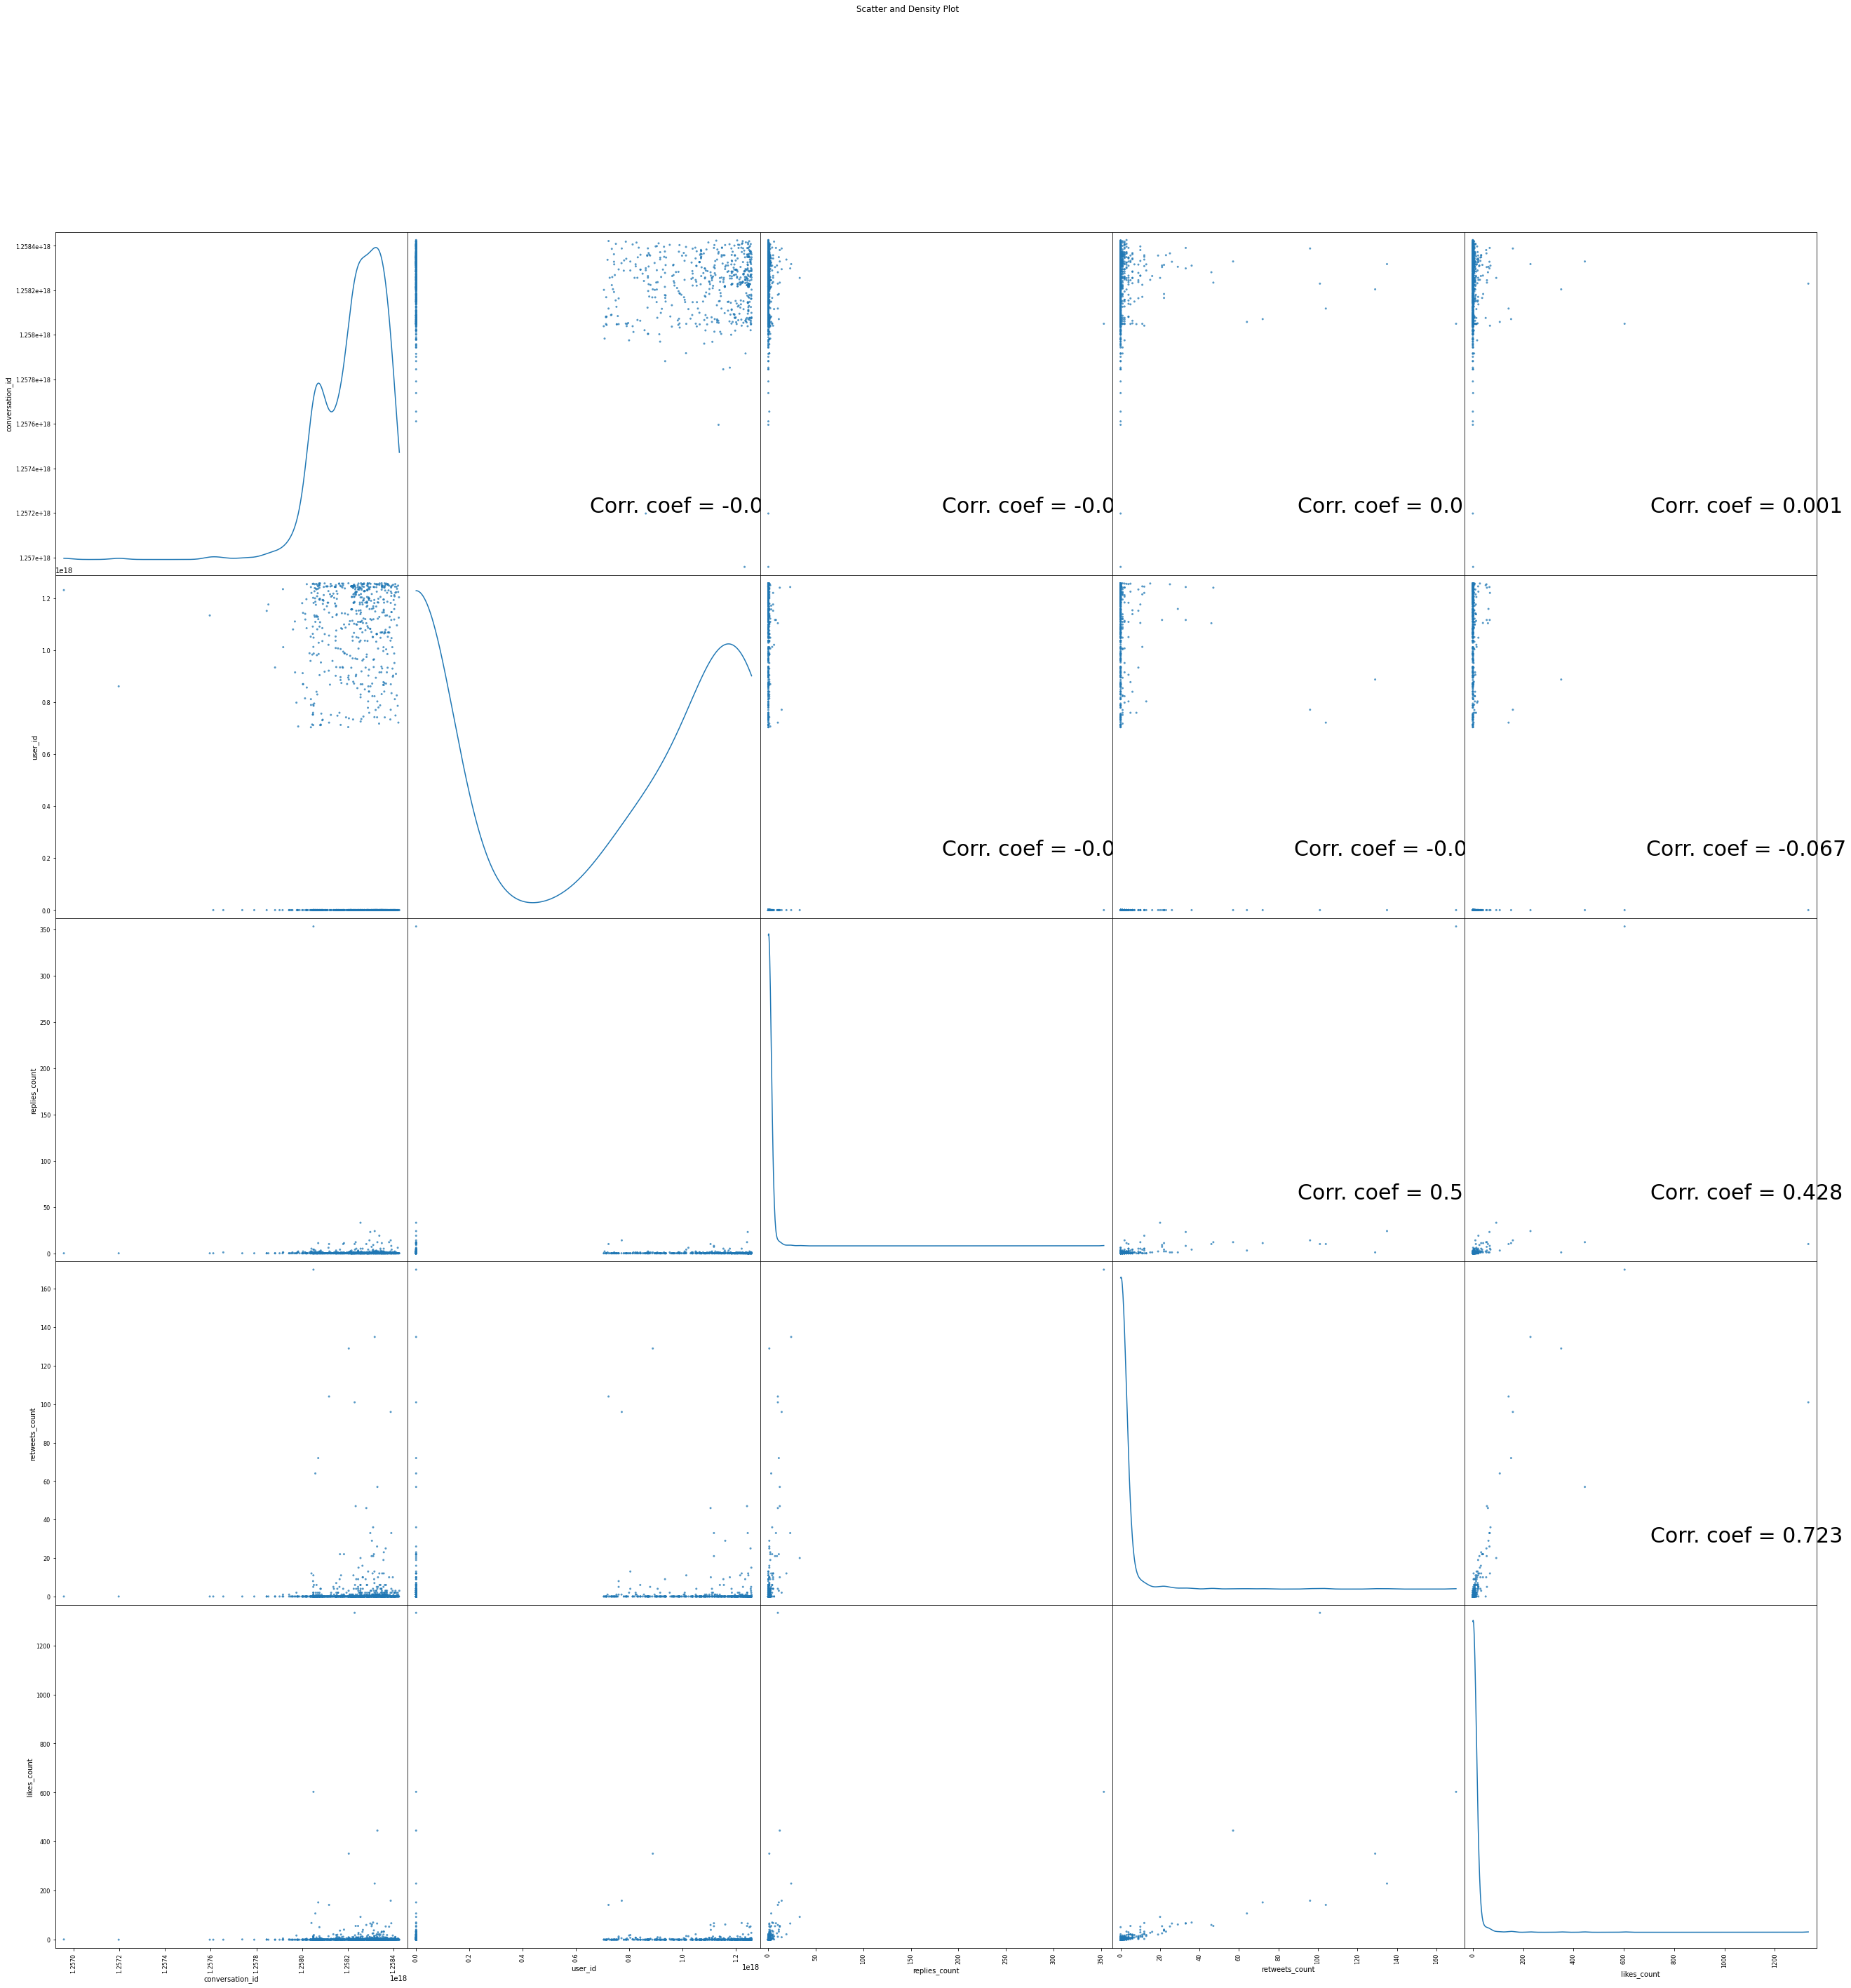

In [26]:
plotScatterMatrix(df3, 45, 30)